# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: activity score 

#### 2. What are the predictors/covariates? 

Answer: demographics (age, gender, location, and profession) 

#### 3. What timeframe is this data relevent for?

Answer: Jan-April 2015

#### 4. What is the hypothesis?

Answer: demographic factors correlate to customer activity score 

## Let's get started with our UCLA admissions dataset

In [50]:
import numpy as np
import pandas as pd
import os
import math
import seaborn as sns

df = pd.read_csv("../assets/admissions.csv")

In [47]:
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


#### 1. Create a data dictionary 

Answer:

(Use the markdown table below as a template)

Variable | Description | Type of Variable
---| ---| ---
Var 1 | 0 = not thing 1 = thing | categorical
Var 2 | thing in unit X | continuous 


In [54]:
variable = ['admit', 'gre', 'gpa', 'prestige']

description = ['0 = N 1 = Y', 'GRE score', 'Grade Point Average', 'Ugrad rank']

type_of_variable = ['categorical', 'continuous', 'continuous', 'categorical']


dictionary = pd.DataFrame([variable, description, type_of_variable], index = ['Variable', 'Description', 'Type of Variable']).T

dictionary

,Variable,Description,Type of Variable
0,admit,0 = N 1 = Y,categorical
1,gre,GRE score,continuous
2,gpa,Grade Point Average,continuous
3,prestige,Ugrad rank,categorical


We would like to explore the association between X and Y 

#### 2. What is the outcome?

Answer: Admit score

#### 3. What are the predictors/covariates? 

Answer: gre, gpa, prestige

#### 4. What timeframe is this data relevent for?

Answer: not specified (2013 per blog post)

#### 5. What is the hypothesis?

Answer: lower prestige rank and higher gre/gpa will correlate with admit = 1

#### 6.Using the above information, write a well-formed problem statement. 


Answer: Determine which students will be admitted to UCLA graduate school, using admissions data and student information which includes gpa, gre scores, and prestige of an applicant's undergraduate alma mater. 



### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: predict a binary outcome for graduate school admissions where 0 represents 'not admitted' and 1 represents 'admitted'

#### 2a. What are the assumptions of the distribution of data? 

Answer: data is normally distributed

#### 2b. How will determine the distribution of your data? 

Answer: plot the data

#### 3a. How might outliers impact your analysis? 

Answer: outliers can skew the mean and the spread of the distribution

#### 3b. How will you test for outliers? 

Answer: can use a box plot to determine if any data points fall far outside of range

#### 4a. What is colinearity? 

Answer: when two independent variable are highly correlated

#### 4b. How will you test for colinearity? 

Answer: create a scatter plot and find the linear association between the 2 variable (p-value)

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 

1 - summarize the data using describe
2 - use histograms for to observe the data 
3 - look for correlation between variables 

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

1. Outline your analysis method for predicting your outcome

In [51]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FBB9198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010156A58>]], dtype=object)

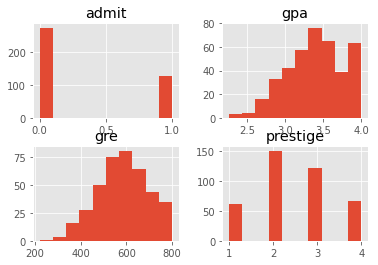

In [52]:
df.hist()

In [55]:
# dummify rank
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


In [58]:
# add dumify ranks to other columns 
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_1':])
print data.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


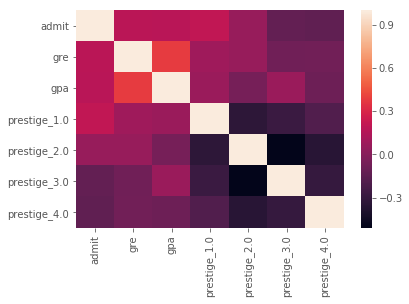

In [60]:
#corr map shows admit correlation to rank. Higher prestige - more correlated
corr_data = data.corr()
sns.heatmap(corr_data)

    2. Write an alternative problem statement for your dataset

    Determine if Prestige rank can predict gpa/gre scores

    3. Articulate the assumptions and risks of the alternative model
    
    assumptions: data is normally distributed
    risks: outliers and sample size can skew the results